# DIMENSIONALITY REDUCTION

Load the Data matrix faceimages.mat given to you. There are 400 face images of size 112×92.

In [26]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from matplotlib import pyplot as plt
import pandas as pd
from copy import deepcopy
import numpy as np
import h5py

def GoogleDriveAuth(ID):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    file = drive.CreateFile({'id': ID})
    return file
File_ID = '0B1uNIZBUi1VzdTl1UHNGNmItZ0VWQ1B3SGEzWEdhSElWUnJV'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('faceimages.mat')

f = h5py.File('faceimages.mat','r') 
data = f.get('data') 
data = np.array(data).T
  

In [0]:
X=data[:,:-1]
Y=data[:, :1]

Construct the data matrix and Mean-center the data.

In [46]:
X=X-np.mean(X, axis=0)
X

array([[-37.7275, -39.91  , -38.8825, ..., -27.105 , -27.8   , -28.3925],
       [-26.7275, -22.91  , -18.8825, ..., -38.105 , -40.8   , -41.3925],
       [-45.7275, -35.91  , -34.8825, ..., -44.105 , -46.8   , -47.3925],
       ...,
       [ 35.2725,  36.09  ,  37.1175, ..., -32.105 , -34.8   , -36.3925],
       [ 32.2725,  32.09  ,  32.1175, ...,  17.895 ,  18.2   ,  13.6075],
       [ 36.2725,  37.09  ,  38.1175, ..., -38.105 , -42.8   , -40.3925]])

Construct covariance matrix for the data.

In [47]:
print('COVARIANCE MATRIX')
X_cov=np.cov(X.T)
print(X_cov.shape)

COVARIANCE MATRIX
(10304, 10304)


Solve eigenvalue problem to find projection matrix

In [0]:
from numpy import linalg as LA
eigen_values,eigen_vectors=LA.eig(X_cov) 

Find low dimensional representation of Face images (dimension=5)

Reconstructed Loss for dimension=5 is:  57659.52311631354


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


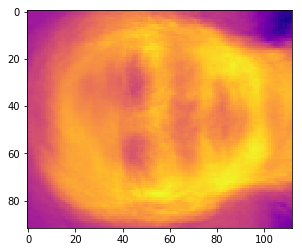

In [52]:
required_dimension=5

# order = np.argsort(eigen_values)[::-1]
# components = eigen_vectors[:, order[:required_dimension]]  #10304X500
# Reduced_Img = X @ components             #400X500
# Img_after_pca=Reduced_Img @ components.T          #400X10304
# Loss=Img_after_pca-X

#OR


Projection=(eigen_vectors.T.dot(X.T)).T      #400X10304
Img_After_Reduction=Projection[:,:required_dimension]   #400X500
required_eigen_vectors=eigen_vectors[:,:required_dimension]   #components
Img_after_PCA=np.dot(Img_After_Reduction,required_eigen_vectors.T)   #400X10304
Loss=Img_after_PCA-X



#Reconstucted Loss
Reconstructed_Loss=np.linalg.norm(Loss)
print('Reconstructed Loss for dimension=5 is: ',Reconstructed_Loss)


img=Img_after_PCA[0].reshape(92,112)
img=img.astype(float)
plt.imshow(img,cmap="plasma")

Find low dimensional representation of Face images (dimension=10)

Reconstructed Loss for dimension=10 is:  50622.092423680515


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


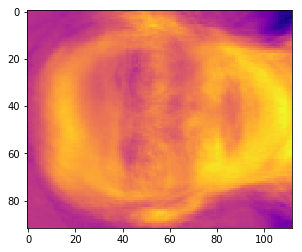

In [54]:
required_dimension=10

# order = np.argsort(eigen_values)[::-1]
# components = eigen_vectors[:, order[:required_dimension]]  #10304X500
# Reduced_Img = X @ components             #400X500
# Img_after_pca=Reduced_Img @ components.T          #400X10304
# Loss=Img_after_pca-X

#OR


Projection=(eigen_vectors.T.dot(X.T)).T      #400X10304
Img_After_Reduction=Projection[:,:required_dimension]   #400X500
required_eigen_vectors=eigen_vectors[:,:required_dimension]   #components
Img_after_PCA=np.dot(Img_After_Reduction,required_eigen_vectors.T)   #400X10304
Loss=Img_after_PCA-X



#Reconstucted Loss
Reconstructed_Loss=np.linalg.norm(Loss)
print('Reconstructed Loss for dimension=10 is: ',Reconstructed_Loss)


img=Img_after_PCA[0].reshape(92,112)
img=img.astype(float)
plt.imshow(img,cmap="plasma")

Find low dimensional representation of Face images (dimension=50)

Reconstructed Loss for dimension=5 is:  34296.54038353623


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


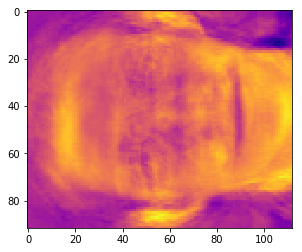

In [55]:
required_dimension=50

# order = np.argsort(eigen_values)[::-1]
# components = eigen_vectors[:, order[:required_dimension]]  #10304X500
# Reduced_Img = X @ components             #400X500
# Img_after_pca=Reduced_Img @ components.T          #400X10304
# Loss=Img_after_pca-X

#OR


Projection=(eigen_vectors.T.dot(X.T)).T      #400X10304
Img_After_Reduction=Projection[:,:required_dimension]   #400X500
required_eigen_vectors=eigen_vectors[:,:required_dimension]   #components
Img_after_PCA=np.dot(Img_After_Reduction,required_eigen_vectors.T)   #400X10304
Loss=Img_after_PCA-X



#Reconstucted Loss
Reconstructed_Loss=np.linalg.norm(Loss)
print('Reconstructed Loss for dimension=5 is: ',Reconstructed_Loss)


img=Img_after_PCA[0].reshape(92,112)
img=img.astype(float)
plt.imshow(img,cmap="plasma")

Find low dimensional representation of Face images (dimension=100)

Reconstructed Loss for dimension=100 is:  26435.891108241503


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


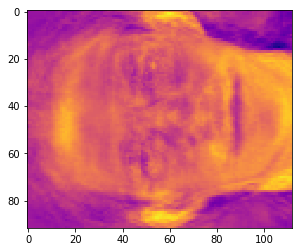

In [56]:
required_dimension=100

# order = np.argsort(eigen_values)[::-1]
# components = eigen_vectors[:, order[:required_dimension]]  #10304X500
# Reduced_Img = X @ components             #400X500
# Img_after_pca=Reduced_Img @ components.T          #400X10304
# Loss=Img_after_pca-X

#OR


Projection=(eigen_vectors.T.dot(X.T)).T      #400X10304
Img_After_Reduction=Projection[:,:required_dimension]   #400X500
required_eigen_vectors=eigen_vectors[:,:required_dimension]   #components
Img_after_PCA=np.dot(Img_After_Reduction,required_eigen_vectors.T)   #400X10304
Loss=Img_after_PCA-X



#Reconstucted Loss
Reconstructed_Loss=np.linalg.norm(Loss)
print('Reconstructed Loss for dimension=100 is: ',Reconstructed_Loss)


img=Img_after_PCA[0].reshape(92,112)
img=img.astype(float)
plt.imshow(img,cmap="plasma")

Draw energy curve of PCA for the given data

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


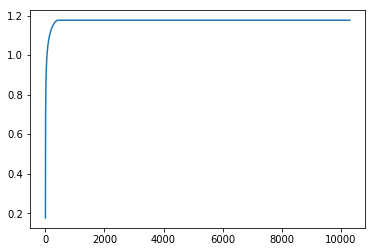

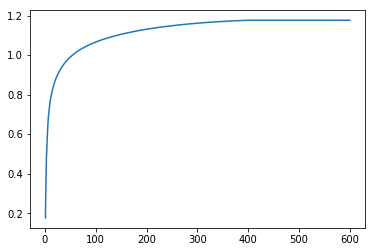

In [38]:
total = np.sum(eigen_values)

gain =[]
gain.append(eigen_values[0]/total)
cur_sum=eigen_values[0]

for i in range(1,len(eigen_values)):    
  cur_sum=cur_sum+eigen_values[i-1]
  gain.append(cur_sum/total)
    
  
l = np.linspace(1,10304,10304)
plt.plot(l,gain[:10304])  
plt.show()


l = np.linspace(1,600,600)
plt.plot(l,gain[:600])  
plt.show()

Reconstructed Loss= 3.885820468590004e-09
Reconstructed Image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


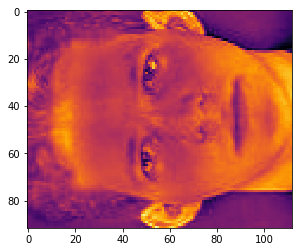

Original Image


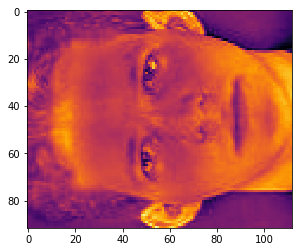

In [51]:
required_dimension=400

# order = np.argsort(eigen_values)[::-1]
# components = eigen_vectors[:, order[:required_dimension]]  #10304X500
# Reduced_Img = X @ components             #400X500
# Img_after_pca=Reduced_Img @ components.T          #400X10304
# Loss=Img_after_pca-X

#OR


Projection=(eigen_vectors.T.dot(X.T)).T      #400X10304
Img_After_Reduction=Projection[:,:required_dimension]   #400X500
required_eigen_vectors=eigen_vectors[:,:required_dimension]   #components
Img_after_PCA=np.dot(Img_After_Reduction,required_eigen_vectors.T)   #400X10304
Loss=Img_after_PCA-X



#Reconstucted Loss
Reconstructed_Loss=np.linalg.norm(Loss)
print('Reconstructed Loss=',Reconstructed_Loss)


import matplotlib.pyplot as plt
print("Reconstructed Image")
img=Img_after_PCA[0].reshape(92,112)
img=img.astype(float)
plt.imshow(img,cmap="inferno")
plt.show()

print("Original Image")
img=X[0].reshape(92,112)
plt.imshow(img,cmap="inferno")
plt.show()

# INBUILT LIBRARY

Read the details about the digit data, load the data.

(1797, 64)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(1797,)


<Figure size 432x288 with 0 Axes>

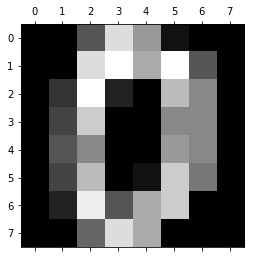

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
digits = load_digits()
print(digits.data.shape)
print(list(digits.target_names))
print(digits.target.shape)
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [2]:
print(digits.data[0])
print(digits.target[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


In [3]:
import numpy as np
print((digits.data[digits.target==0]).shape)
unique_elements, counts_elements = np.unique(digits.target, return_counts=True)
print(unique_elements,counts_elements)

(178, 64)
[0 1 2 3 4 5 6 7 8 9] [178 182 177 183 181 182 181 179 174 180]


Select 100 images from each class. Perform PCA , LDA , ISOMap, LLE and LE on the data.

In [4]:
#X_train
train=digits.data[digits.target==0][0:100]
train=np.append(train,digits.data[digits.target==1][0:100],axis=0)
train=np.append(train,digits.data[digits.target==2][0:100],axis=0)
train=np.append(train,digits.data[digits.target==3][0:100],axis=0)
train=np.append(train,digits.data[digits.target==4][0:100],axis=0)
train=np.append(train,digits.data[digits.target==5][0:100],axis=0)
train=np.append(train,digits.data[digits.target==6][0:100],axis=0)
train=np.append(train,digits.data[digits.target==7][0:100],axis=0)
train=np.append(train,digits.data[digits.target==8][0:100],axis=0)
train=np.append(train,digits.data[digits.target==9][0:100],axis=0)
train=np.append(train,digits.data[digits.target==10][0:100],axis=0)
print(train.shape)

(1000, 64)


In [5]:
#Y_train
Y_train=digits.target[digits.target==0][0:100]
Y_train=np.append(Y_train,digits.target[digits.target==1][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==2][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==3][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==4][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==5][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==6][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==7][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==8][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==9][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==10][0:100])
print(Y_train.shape)

(1000,)


PRINCIPAL COMPONENT ANALYSIS

BEFORE PCA: (1000, 64)
AFTER PCA: (1000, 3)
[[ -9.85965273   7.75032973 -21.48660164]
 [  1.67371028  13.791531   -19.11248229]
 [ -2.57568541  11.44762069 -21.14164991]
 ...
 [-21.31961556  -9.62229247  -3.28252191]
 [-17.02355339  -3.98511642  -9.65024389]
 [-26.17659901  -7.36402569  -4.8094615 ]]


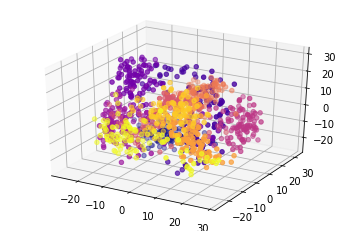

In [6]:
#PCA
print('BEFORE PCA:',train.shape)
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
train_after_PCA=pca.fit_transform(train)
print('AFTER PCA:',(train_after_PCA).shape)
print(train_after_PCA)

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = train_after_PCA[:,0]
ydata = train_after_PCA[:,1]
zdata = train_after_PCA[:,2]
ax.scatter3D(xdata, ydata, zdata, c=Y_train, cmap='plasma');

LINEAR DISCRIMINANT ANALYSIS

BEFORE PCA: (1000, 64)
AFTER LDA: (1000, 3)
[[-2.21024406 -6.57893371  1.49556218]
 [-3.31607125 -4.25741316  2.02927022]
 [-1.73400496 -5.25934267  2.01606303]
 ...
 [ 2.29095954 -1.04920897 -0.82326097]
 [ 1.59692647 -0.39359492  0.70581953]
 [ 2.32307064 -1.84163341 -0.80759391]]


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


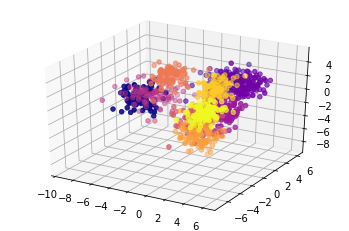

In [7]:
#LDA
print('BEFORE PCA:',train.shape)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3)  
train_after_LDA = lda.fit_transform(train,Y_train) 
print('AFTER LDA:',(train_after_LDA).shape)
print(train_after_LDA)

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = train_after_LDA[:,0]
ydata = train_after_LDA[:,1]
zdata = train_after_LDA[:,2]
ax.scatter3D(xdata, ydata, zdata, c=Y_train, cmap='plasma');

ISO MAP

BEFORE ISOMAP: (1000, 64)
AFTER ISOMAP: (1000, 3)
[[-197.74116932  -17.8825264   -20.39322969]
 [-215.94553104  -14.31696065   -9.75168238]
 [-169.97700777  -11.35726163   -5.93084201]
 ...
 [ -53.01369424  -87.46800828    9.81002929]
 [ -60.80113046  -59.98151368  -12.60063093]
 [ -44.435729    -98.93533415   18.89139487]]


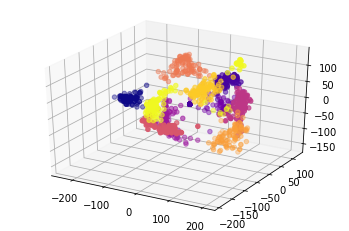

In [8]:
#ISO MAP
print('BEFORE ISOMAP:',train.shape)
from sklearn.manifold import Isomap
embedding = Isomap(n_components=3)
train_after_ISOMAP = embedding.fit_transform(train)
print('AFTER ISOMAP:',(train_after_ISOMAP).shape)
print(train_after_ISOMAP)

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = train_after_ISOMAP[:,0]
ydata = train_after_ISOMAP[:,1]
zdata = train_after_ISOMAP[:,2]
ax.scatter3D(xdata, ydata, zdata, c=Y_train, cmap='plasma');

Locally Linear Embedding

BEFORE LLE: (1000, 64)
AFTER LLE: (1000, 3)
[[ 6.38141890e-03 -3.59067046e-02  6.91171462e-07]
 [ 6.38255460e-03 -3.59080811e-02  5.72244073e-07]
 [ 6.38297362e-03 -3.59085890e-02  5.28365554e-07]
 ...
 [-9.43229297e-04 -3.35156498e-02  7.30500554e-07]
 [-9.32188944e-04 -3.35208662e-02  5.39800305e-07]
 [-9.61974479e-04 -3.35111493e-02  5.39213812e-07]]


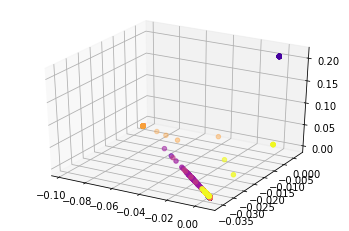

In [9]:
#Locally Linear Embedding
print('BEFORE LLE:',train.shape)
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=3)
train_after_LLE = embedding.fit_transform(train)
print('AFTER LLE:',(train_after_LLE).shape)
print(train_after_LLE)

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = train_after_LLE[:,0]
ydata = train_after_LLE[:,1]
zdata = train_after_LLE[:,2]
ax.scatter3D(xdata, ydata, zdata, c=Y_train, cmap='plasma');

Laplacian Encoding

BEFORE Laplacian Encoding: (1000, 64)
AFTER Laplacian Encoding: (1000, 3)
[[ 8.62408186e-03 -3.86671924e-04 -3.10394926e-03]
 [ 7.24535972e-03  2.94747597e-04 -2.62245514e-03]
 [ 8.82928561e-03 -2.32418658e-04 -2.97306574e-03]
 ...
 [ 8.85022818e-05 -5.03317420e-03  1.70189237e-03]
 [ 4.61715475e-04 -4.20990556e-03  1.28907325e-03]
 [ 3.28464086e-04 -5.10800512e-03  1.45862231e-03]]


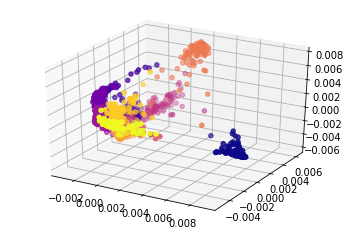

In [10]:
#Laplacian Encoding
print('BEFORE Laplacian Encoding:',train.shape)
from sklearn.manifold import SpectralEmbedding
embedding = SpectralEmbedding(n_components=3)
train_after_LE = embedding.fit_transform(train)
print('AFTER Laplacian Encoding:',(train_after_LE).shape)
print(train_after_LE)

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = train_after_LE[:,0]
ydata = train_after_LE[:,1]
zdata = train_after_LE[:,2]
ax.scatter3D(xdata, ydata, zdata, c=Y_train, cmap='plasma');